## notebook 02: position error plotting

In this notebook we read in the experiment result dataframe and plot boxplots of individual performance separated by condition overlaid by scattered single participant data. We additonally calculate a quadratic regression and its local minimum to motivate separating our linear regression modelling into two parts in the next notebook.

In [1]:
# importing python packages
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
import matplotlib as mpl
import os
# importing modules from our analysis pipeline
from utilities import helpers

In [2]:
# set data path and save path
data_root = f"..{os.sep}data{os.sep}"
save_path = f"..{os.sep}figures{os.sep}"

#### read in data

In [3]:
# read in experiment result dataframe
experiment_results = pd.read_csv(data_root + "processed_data.csv")
experiment_results.head()

session_num  block_num    trial_name  line_i   experiment       ppid  \
0            1          1  99_obj_right       0  MM04_PU01_2  MM04_PU01   
1            1          1   2_obj_right       1  MM04_PU01_2  MM04_PU01   
2            1          1   3_obj_right       2  MM04_PU01_2  MM04_PU01   
3            1          1  10_obj_right       3  MM04_PU01_2  MM04_PU01   
4            1          1   2_obj_right       4  MM04_PU01_2  MM04_PU01   

   trial_num  trial_num_in_block  start_time  end_time  ... goalEstimateZ  \
0          1                   1    1007.957  1069.763  ...      2.708552   
1          2                   2    1069.763  1143.276  ...     -0.698157   
2          3                   3    1143.276  1206.921  ...      2.127848   
3          4                   4    1206.921  1276.941  ...     -4.614375   
4          5                   5    1276.941  1352.005  ...     -1.345040   

  goalTrueX  goalTrueY  goalTrueZ  confidence  flagged  num_objects  \
0       0.0        0.0        0.0    0.043412    False           99   
1       0.0        0.0        0.0    0.262324    False            2   
2       0.0        0.0        0.0    0.214372    False            3   
3       0.0        0.0        0.0    0.291512    False           10   
4       0.0        0.0        0.0    0.235219    False            2   

   err_pos_walk  err_dist_walk  err_dir_walk  
0      2.708553      -2.708552      0.004725  
1      9.236702       2.298801    -19.717797  
2      8.713744      -0.616872    -20.276377  
3      4.695786       4.627169      1.683901  
4      7.918898       2.476553    -16.500153  

[5 rows x 28 columns]

#### group data by median for easy handling

In [4]:
# group dataframe by condition ("num_objects") and participants ("ppid")
grouped = experiment_results.groupby(["num_objects", "ppid"])
# then calculate the median position error
grouped_errors = grouped["err_pos_walk"].median()
# and position error standard deviation
grouped_errors_sd = grouped["err_pos_walk"].std()
# and reset the MultiIndex for easier access
grouped_errors = grouped_errors.reset_index()
grouped_errors_sd = grouped_errors_sd.reset_index()
# and join both measures into one DataFrame
grouped_errors["err_pos_walk"] = grouped_errors.err_pos_walk
grouped_errors["err_pos_walk_sd"] = grouped_errors_sd.err_pos_walk
grouped_errors.head()

num_objects       ppid  err_pos_walk  err_pos_walk_sd
0            0  MM04_PU01     14.232398        11.830277
1            0  MM04_PU03      8.602727         3.952069
2            0  MM04_PU04     10.754587         8.104135
3            0  MM04_PU05     12.392232         5.642666
4            0  MM04_PU06      6.506571         4.099559

#### add column with performance in forest condition

In [5]:
performance = helpers.get_performance_dict(data_root + "processed_data.csv", colormap="pink", colormap_part=[0, .75])
performance_dict = performance["performance_dict"]
ppid_colormap = performance["colormap"]
# use performance dictionary to make a column "performance_score" that holds for each datapoint 
# ...the performance in forest condition
performance_score = [performance_dict[ppid] for ppid in grouped_errors.ppid]
grouped_errors["performance_score"] = performance_score

## Figure 4

Here we bring together boxplots of population data, and swarmplots of individual performance colorcoded by the performance in the 99 object condition to generate Figure 4 from the paper. The top panel displays performance accuracy as position error and the bottom panel displays performance precision as standard deviation of positio error. We also add coloured panels that visualise the <font color="#a8bb7e"> **decrease in position error** </font> and the <font color="#9774ad"> **increase in position error** </font> that we describe further with linear regression models in the next notebook

C:\Users\jscherer1\Anaconda3\envs\virtual_forest_paper\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 8.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jscherer1\Anaconda3\envs\virtual_forest_paper\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 34.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jscherer1\Anaconda3\envs\virtual_forest_paper\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 43.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jscherer1\Anaconda3\envs\virtual_forest_paper\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg

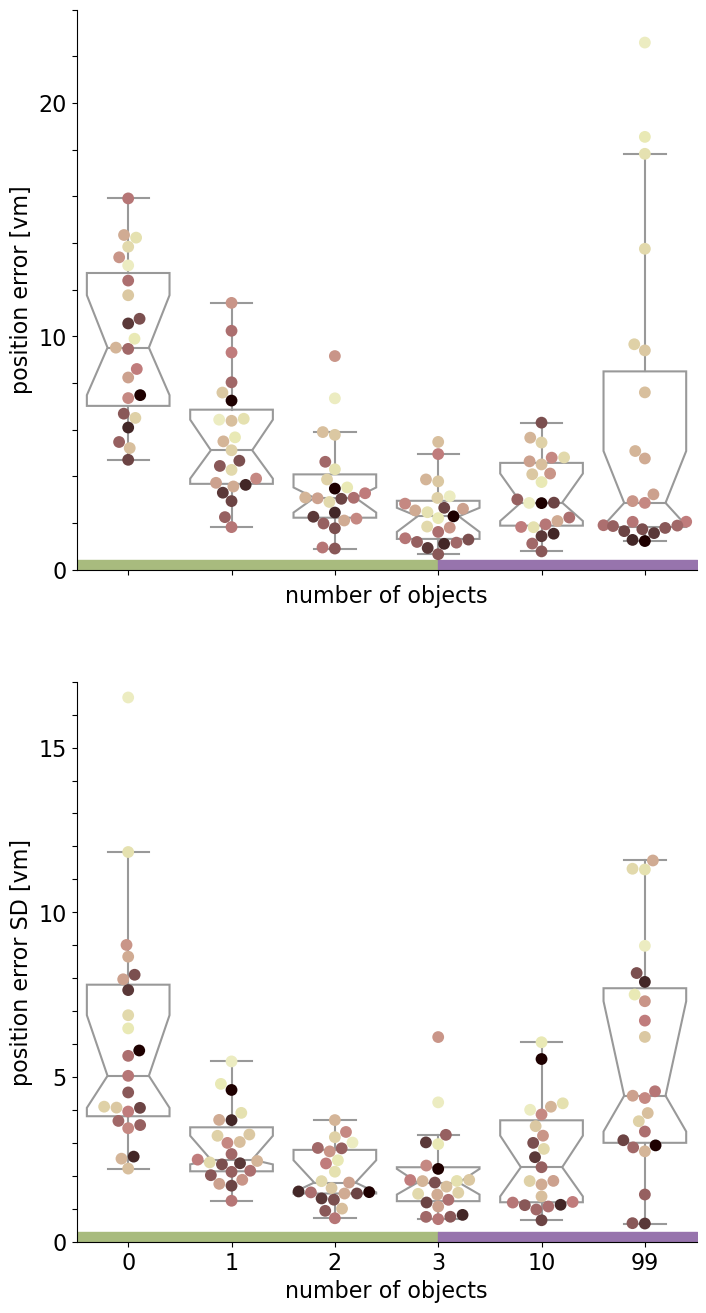

In [14]:
# set up figure
fig, axs = plt.subplots(2,1)

####################################################################################################
########################################## ACCURACY ################################################
####################################################################################################

# plot horizontal colorbar at the bottom
axs[0].fill_between(x=[-0.5, 3], y1=[0, 0], y2=[0.4, 0.4], facecolor="#a8bb7e", edgecolor="#a8bb7e")
axs[0].fill_between(x=[3, 5.5], y1=[0, 0], y2=[0.4, 0.4], facecolor="#9774ad", edgecolor="#9774ad")

# add boxplot
sb.boxplot(data=grouped_errors, ax=axs[0], y="err_pos_walk", x="num_objects", color="white", showfliers=False, notch=True, bootstrap=10000)

n_ppids = len(np.unique(experiment_results.ppid))
# set colormap for swarmplot
performance = helpers.get_performance_dict(data_root + "processed_data.csv", colormap="pink", colormap_part=[0, .75])
swarmplot_colormap = performance["colormap"]

# add swarmplot
sb.swarmplot(data=grouped_errors, ax=axs[0], y="err_pos_walk", x="num_objects", hue="performance_score", palette=sb.color_palette(swarmplot_colormap), size=8.5)

# set figure and axis parameters
fig.suptitle("")
axs[0].set_title("")
axs[0].set_xlabel("number of objects", fontsize=16)
axs[0].set_ylabel("position error [vm]", fontsize=16)
axs[0].set_yticks([0,2,4,6,8,10,12,14,16,18,20,22,24])
axs[0].set_yticklabels(["0","","","","","10","","","","","20","",""], fontsize=16)
axs[0].set_xticklabels(["","","","","",""], fontsize=16)
axs[0].set_ylim([0,24])
axs[0].get_legend().remove()
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

####################################################################################################
########################################## PRECISION ###############################################
####################################################################################################

# plot horizontal colorbars at the bottom
axs[1].fill_between(x=[-0.5, 3], y1=[0, 0], y2=[0.3, 0.3], facecolor="#a8bb7e", edgecolor="#a8bb7e")
axs[1].fill_between(x=[3, 5.5], y1=[0, 0], y2=[0.3, 0.3], facecolor="#9774ad", edgecolor="#9774ad")

# add boxplot
sb.boxplot(data=grouped_errors, ax=axs[1], y="err_pos_walk_sd", x="num_objects", color="white", showfliers=False, notch=True, bootstrap=10000)

n_ppids = len(np.unique(experiment_results.ppid))
# set colormap for swarmplot
performance = helpers.get_performance_dict(data_root + "processed_data.csv", colormap="pink", colormap_part=[0, .75])
swarmplot_colormap = performance["colormap"]

# add swarmplot
sb.swarmplot(data=grouped_errors, ax=axs[1], y="err_pos_walk_sd", x="num_objects", hue="performance_score", palette=sb.color_palette(swarmplot_colormap), size=8.5)

# set figure and axis parameters
axs[1].set_title("")
axs[1].set_xlabel("number of objects", fontsize=16)
axs[1].set_ylabel("position error SD [vm]", fontsize=16)
axs[1].set_yticks(np.arange(0,18))
axs[1].set_yticklabels(["0","","","","","5","","","","","10","","","","","15","","",], fontsize=16)
axs[1].set_xticklabels(["0","1","2","3","10","99"], fontsize=16)
axs[1].set_ylim([0,17])
axs[1].get_legend().remove()
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

####################################################################################################

# set figure size
fig.set_size_inches(8,16)
# save figure as svg and png in save path
filename = "figure_4.{}"
fig.savefig(save_path + filename.format("svg"))
fig.savefig(save_path + filename.format("png"), dpi=300)
fig.savefig(save_path + filename.format("pdf"))
fig.savefig(save_path + filename.format("tiff"), dpi=300)
# please note the UserWarning output by seaborn\categorical module was respected, points were counted by hand and
# there are 23 points for each boxplot, 1 for each participant, alike expected.

## Figure 5

Here we bring together swarmplots of individual performance colorcoded by the performance in the 99 object condition and quadratic regressions to generate Figure 5 from the paper. The top panel displays performance accuracy as position error and the bottom panel displays performance precision as standard deviation of positio error. Both measures are displayed in logarithmic scale because this depicts how the data is fit in our linear regression models in the next step. We also add coloured panels that visualise the <font color="#a8bb7e"> **decrease in position error** </font> and the <font color="#9774ad"> **increase in position error** </font> that we describe further with linear regression models in the next notebook

#### define function to calculate quadratic regression

In [9]:
def quadratic_regression(x, y):
    quad = np.polyfit(x, y, 2)
    poly = np.poly1d(quad)
    dat = np.linspace(min(x), max(x), 1000)
    x_fit = dat
    y_fit = poly(dat)
    # local minimum
    loc_min_x = -quad[1] / (2 * quad[0])
    loc_min_y = poly(loc_min_x)
    # r squared
    ybar = np.sum(y) / len(y)
    y_pred = poly(x)
    # ssreg = np.sum((y_fit - ybar) ** 2)
    sstot = np.sum((y - ybar) ** 2)
    ssres = np.sum((y - y_pred)**2)
    r2 = 1 - (ssres/sstot)
    # https://stats.stackexchange.com/questions/334004/can-r2-be-greater-than-1
    # https://365datascience.com/tutorials/statistics-tutorials/sum-squares/

    return x_fit, y_fit, loc_min_x, loc_min_y, r2

#### calculate quadratic regression for accuracy and precision

In [10]:
# define dictionary with ordinal values for conditions
cond_dict = {"0": 0, "1": 1, "2": 2, "3": 3, "10": 4, "99": 5}
# use dictionary to generate x array for regression
x = [cond_dict[str(a)] for a in grouped_errors.num_objects]
# use position error as y array for regression
y = grouped_errors.err_pos_walk
y_sd = grouped_errors.err_pos_walk_sd
# calcualte x, y, local minimum and R2 for a quadratic regression in logarithmic domain
fit_x_2, fit_y_2, loc_min_x_2, loc_min_y_2, r2_2 = quadratic_regression(x, np.log(y))
fit_x_sd_2, fit_y_sd_2, loc_min_x_sd_2, loc_min_y_sd_2, r2_sd_2 = quadratic_regression(x, np.log(y_sd))

print(f"Accuracy: minimum of quadratic fit (R2={np.round(r2_2,3)}) is: y={np.round(loc_min_y_2, 3)} at x={np.round(loc_min_x_2, 3)}")
print(f"Precision: minimum of quadratic fit (R2={np.round(r2_sd_2,3)}) is: y={np.round(loc_min_y_sd_2, 3)} at x={np.round(loc_min_x_sd_2, 3)}")

Accuracy: minimum of quadratic fit (R2=0.386) is: y=0.878 at x=3.188
Precision: minimum of quadratic fit (R2=0.355) is: y=0.522 at x=2.663


#### read in regression confidence intervals (calculated in R notebook nb_03a and nb_03p)

In [11]:
# load  the confidence intervals saved from the R notebook 
quadratic_fit_CIs = pd.read_csv(data_root + "quadratic_fit_CIs.csv", index_col=0)
quadratic_fit_CIs["condition"] = [0,1,2,3,4,5]
quadratic_fit_CIs_sd = pd.read_csv(data_root + "sd_quadratic_fit_CIs.csv", index_col=0)
quadratic_fit_CIs_sd["condition"] = [0,1,2,3,4,5]

#### plot figure 5

C:\Users\jscherer1\Anaconda3\envs\virtual_forest_paper\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 8.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


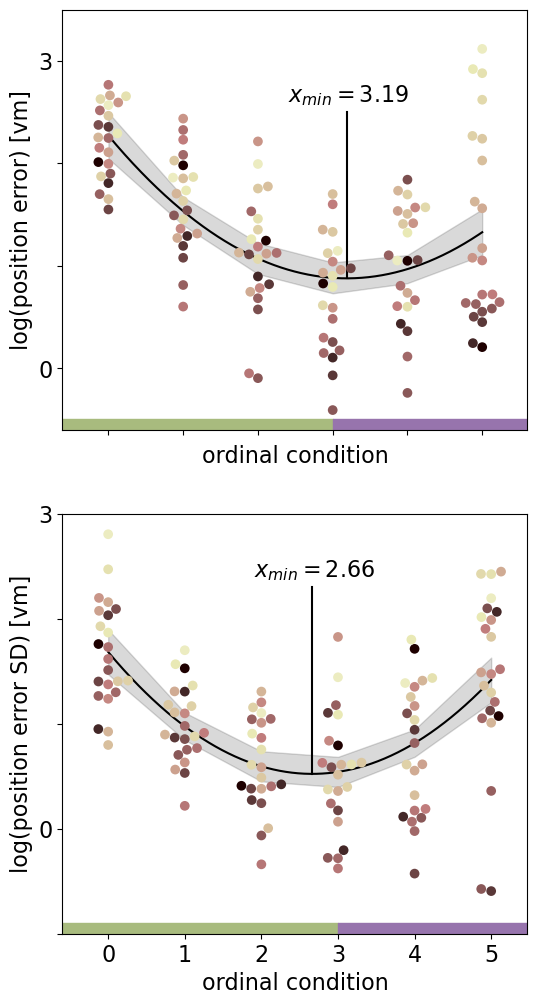

In [13]:
# set up quadratic fit figure
fig, axs = plt.subplots(2,1)

####################################################################################################
########################################## ACCURACY ################################################
####################################################################################################

# log-transform position_error
grouped_errors["log_err_pos_walk"] = np.log(grouped_errors["err_pos_walk"])

# make horizontal colorbars at the bottom
axs[0].fill_between(x=[-2, 3], y1=[-0.6, -0.6], y2=[-0.5, -0.5], facecolor="#a8bb7e", edgecolor="#a8bb7e")
axs[0].fill_between(x=[3, 7], y1=[-0.6, -0.6], y2=[-0.5, -0.5], facecolor="#9774ad", edgecolor="#9774ad")

n_ppids = len(np.unique(experiment_results.ppid))
# set colormap for swarmplot
performance = helpers.get_performance_dict(data_root + "processed_data.csv", colormap="pink", colormap_part=[0, .75])
swarmplot_colormap = performance["colormap"]

# add swarmplot
sb.swarmplot(data=grouped_errors, ax=axs[0], y="log_err_pos_walk", x="num_objects", hue="performance_score", palette=sb.color_palette(swarmplot_colormap), size=7)

# add quadratic regression
quadratic_color = "black"
axs[0].plot(fit_x_2, fit_y_2, color=quadratic_color)
axs[0].plot([loc_min_x_2, loc_min_x_2], [loc_min_y_2, 2.5], color=quadratic_color)
axs[0].text(x=2.4, y=2.6, s="$x_{min} =$" + f"{np.round(loc_min_x_2,2)}", fontsize=16)
axs[0].fill_between(x=[0,1,2,3,4,5], y1=quadratic_fit_CIs.lwr, y2=quadratic_fit_CIs.upr, color=quadratic_color, alpha=0.15)

axs[0].set_xticks([0,1,2,3,4,5])
axs[0].set_xticklabels(["","","","","",""], fontsize=16)
axs[0].set_yticks([-1,0,1,2,3])
axs[0].set_yticklabels(["","0","","","3"], fontsize=16)
axs[0].set_xlabel("ordinal condition", fontsize=16)
axs[0].set_ylabel("log(position error) [vm]", fontsize=16)
axs[0].set_ylim(-0.6, 3.5)
axs[0].get_legend().remove()

####################################################################################################
########################################## PRECISION ###############################################
####################################################################################################

grouped_errors["log_err_pos_walk_sd"] = np.log(grouped_errors["err_pos_walk_sd"])

axs[1].fill_between(x=[-2, 3], y1=[-1, -1], y2=[-0.9, -0.9], facecolor="#a8bb7e", edgecolor="#a8bb7e")
axs[1].fill_between(x=[3, 7], y1=[-1, -1], y2=[-0.9, -0.9], facecolor="#9774ad", edgecolor="#9774ad")

n_ppids = len(np.unique(experiment_results.ppid))
# set colormap for swarmplot
performance = helpers.get_performance_dict(data_root + "processed_data.csv", colormap="pink", colormap_part=[0, .75])
swarmplot_colormap = performance["colormap"]

# add swarmplot
sb.swarmplot(data=grouped_errors, ax=axs[1], y="log_err_pos_walk_sd", x="num_objects", hue="performance_score", palette=sb.color_palette(swarmplot_colormap), size=7)

# add quadratic regression
axs[1].plot(fit_x_sd_2, fit_y_sd_2, color=quadratic_color)
axs[1].plot([loc_min_x_sd_2, loc_min_x_sd_2], [loc_min_y_sd_2, 2.3], color=quadratic_color)
axs[1].text(x=1.9, y=2.4, s="$x_{min} =$" + f"{np.round(loc_min_x_sd_2,2)}", fontsize=16)
axs[1].fill_between(x=[0,1,2,3,4,5], y1=quadratic_fit_CIs_sd.lwr, y2=quadratic_fit_CIs_sd.upr, color=quadratic_color, alpha=0.15)

axs[1].set_xticks([0,1,2,3,4,5])
axs[1].set_xticklabels(["0","1","2","3","4","5"], fontsize=16)
axs[1].set_yticks([-1,0,1,2,3])
axs[1].set_yticklabels(["","0","","","3"], fontsize=16)
axs[1].set_xlabel("ordinal condition", fontsize=16)
axs[1].set_ylabel("log(position error SD) [vm]", fontsize=16)
axs[1].set_ylim(-1, 3)
axs[1].get_legend().remove()

####################################################################################################

fig.set_size_inches(6,12)
filename = "figure_5.{}"
fig.savefig(save_path + filename.format("svg"))
fig.savefig(save_path + filename.format("png"), dpi=300)
fig.savefig(save_path + filename.format("pdf"))
fig.savefig(save_path + filename.format("tiff"), dpi=300)
# please note the UserWarning output by seaborn\categorical module was respected, points were counted by hand and
# there are 23 points for each boxplot, 1 for each participant, alike expected.